In [3]:
# Morphology
    # Structuring Element
    # Dilation
    # Erosion
    # Closing
    # Opening
    # Removing Small Holes
    # Removing Small Objects
    # Region Properties


In [4]:
import cv2 
import matplotlib.pyplot as plt
import skimage as ski
from img_util import imshow


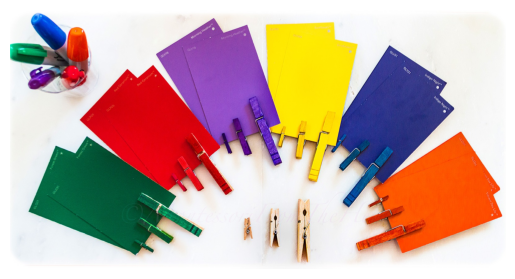

In [5]:
img = cv2.imread('img3.jpeg')
imshow(img[:,:,::-1],'')

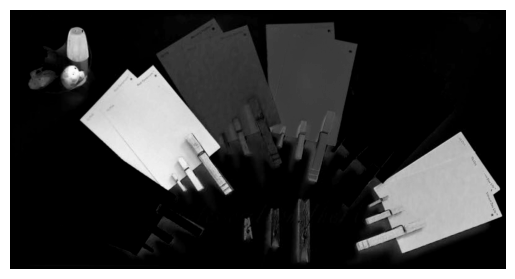

In [6]:
red_img = cv2.subtract(
    img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)
imshow(red_img, '', 'gray')

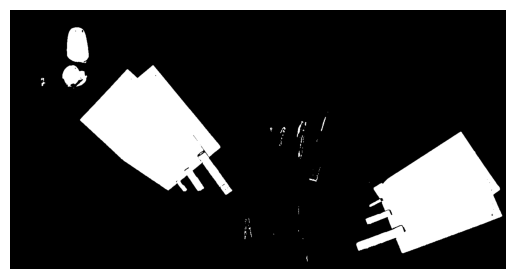

In [7]:
_, red_bw = cv2.threshold(red_img, 60, 255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [8]:
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

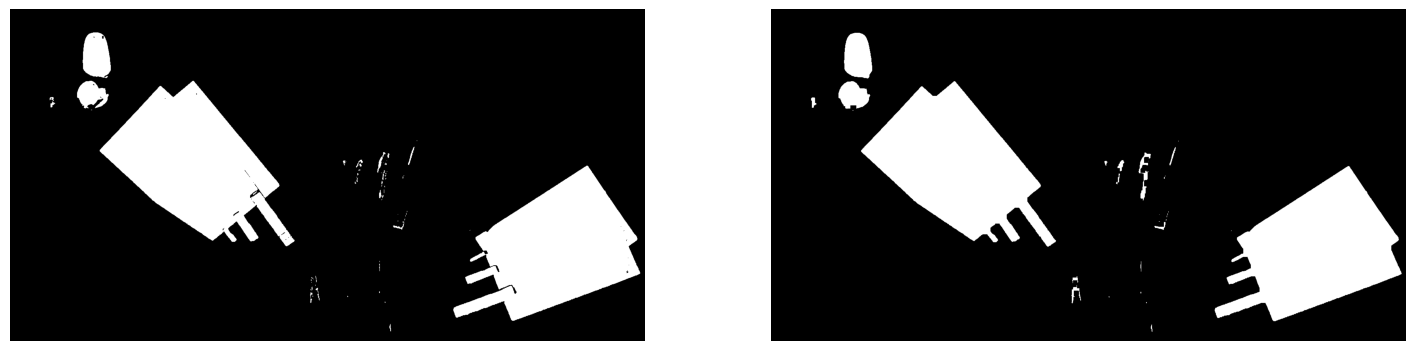

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_close = cv2.morphologyEx(red_bw, cv2.MORPH_CLOSE, strel,  iterations=1)
imshow(red_close, '', 'gray')

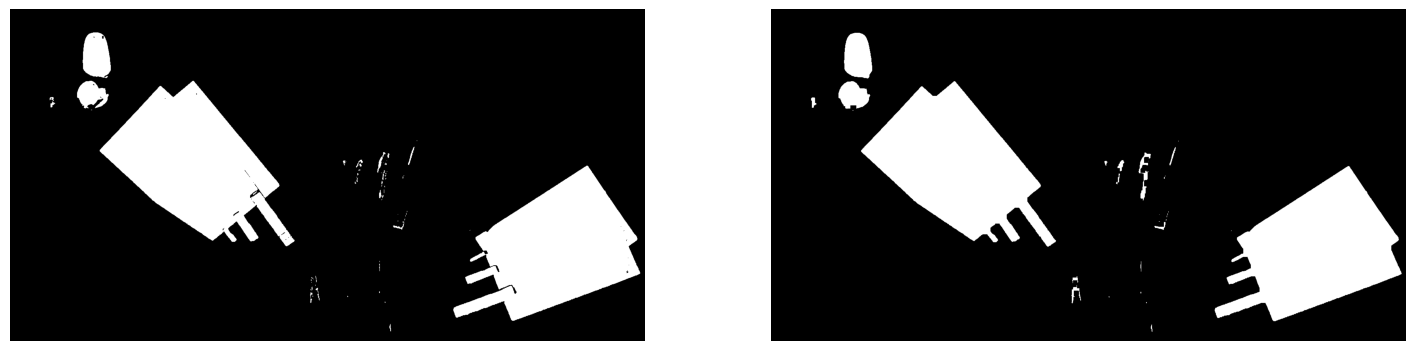

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_close2 = cv2.morphologyEx(red_bw, cv2.MORPH_CLOSE, strel,  iterations=1)
imshow(red_close2, '', 'gray')

In [11]:
help

Type help() for interactive help, or help(object) for help about object.

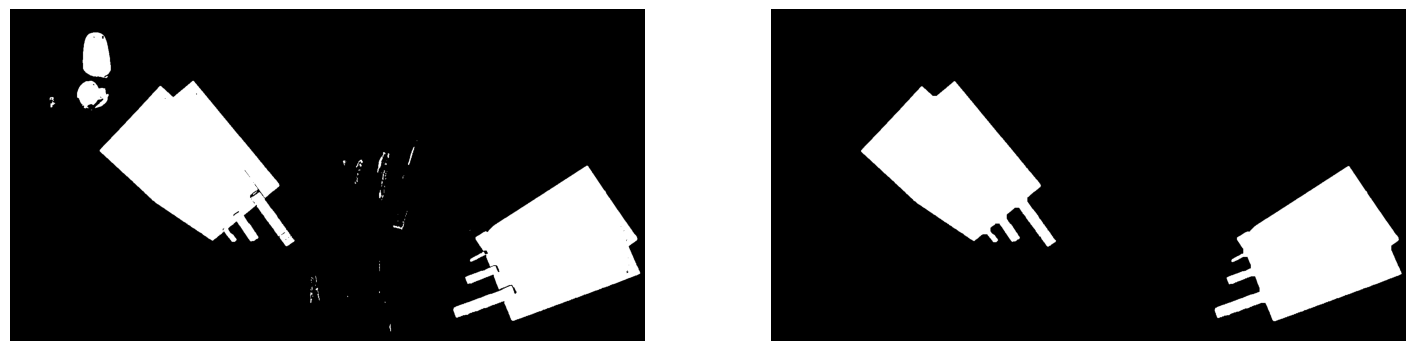

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
imshow(red_close3, '', 'gray')

In [13]:
rp = ski.measure.regionprops(ski.measure.label(
    red_close3.astype('uint8')))
rp

In [14]:
ski.measure.label(
    red_close3.astype('uint8')
).max()

2

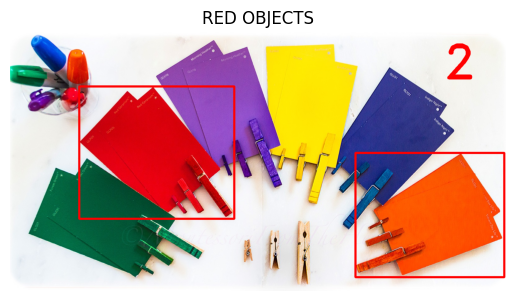

In [15]:
img =cv2.imread('img3.jpeg')
red_img = cv2.subtract(
    img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)
_, red_bw = cv2.threshold(red_img, 60, 255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
red_dilate = cv2.dilate(red_bw, strel)
red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations=1)
red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool), 15000)
rp = ski.measure.regionprops(
    ski.measure.label(
        red_close3.astype('uint8')
    ))
img_copy = img.copy()
for r in rp:
    y1,x1,y2,x2 = r.bbox
    cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255], thickness=5)
count = str(len(rp))
cv2.putText(
    img_copy, count, (img_copy.shape[1]-200,150),
    cv2.FONT_HERSHEY_DUPLEX,5,(0,0,255), thickness=10
)
imshow(img_copy[:,:,::-1], 'RED OBJECTS')

Error in callback <function _draw_all_if_interactive at 0x000001A675EF5940> (for post_execute):


KeyboardInterrupt: 

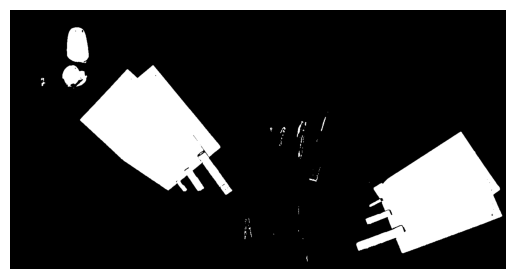

In [25]:
vid  = cv2.VideoCapture(0)
while True:
    ack, im = vid.read()
    if ack:
        red_img = cv2.subtract(
            img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        )
        _, red_bw = cv2.threshold(red_img, 60, 255,cv2.THRESH_BINARY)
        imshow(red_bw,'','gray')
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        red_dilate = cv2.dilate(red_bw, strel)
        red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations=1)
        red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool), 15000)
        rp = ski.measure.regionprops(
            ski.measure.label(
                red_close3.astype('uint8')
            ))
        img_copy = img.copy()
        for r in rp:
            y1,x1,y2,x2 = r.bbox
            cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255], thickness=5)
        count = str(len(rp))
        cv2.putText(
            img_copy, count, (img_copy.shape[1]-200,150),
            cv2.FONT_HERSHEY_DUPLEX,5,(0,0,255), thickness=10
        )

        cv2.imshow('Preview',im)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break

cv2.destroyAllWindows()

vid.release()